<a href="https://colab.research.google.com/github/polinakochneva1/me_labs_house/blob/main/%D0%B3%D0%B5%D0%BE%D1%80%D0%B3%D0%B8%D0%B9_5_IMG_CLF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

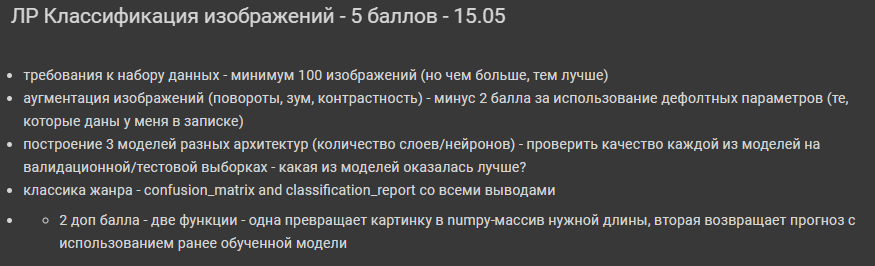

In [31]:
!unzip /content/jopa.zip

Archive:  /content/jopa.zip
   creating: test/
  inflating: test/photo_2024-05-05_14-31-13.jpg  
  inflating: test/photo_2024-05-05_14-31-14 (2).jpg  
  inflating: test/photo_2024-05-05_14-31-14 (3).jpg  
  inflating: test/photo_2024-05-05_14-31-14.jpg  
  inflating: test/photo_2024-05-05_14-31-15 (2).jpg  
  inflating: test/photo_2024-05-05_14-31-15.jpg  
  inflating: test/photo_2024-05-05_14-31-16 (2).jpg  
  inflating: test/photo_2024-05-05_14-31-16 (3).jpg  
  inflating: test/photo_2024-05-05_14-31-16 (4).jpg  
  inflating: test/photo_2024-05-05_14-31-16.jpg  
  inflating: test/photo_2024-05-05_14-31-17 (2).jpg  
  inflating: test/photo_2024-05-05_14-31-17 (3).jpg  
  inflating: test/photo_2024-05-05_14-31-17 (4).jpg  
  inflating: test/photo_2024-05-05_14-31-17 (5).jpg  
  inflating: test/photo_2024-05-05_14-31-17.jpg  
  inflating: test/photo_2024-05-05_14-31-18 (2).jpg  
  inflating: test/photo_2024-05-05_14-31-18 (3).jpg  
  inflating: test/photo_2024-05-05_14-31-18 (4).jpg  
 

In [32]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential

In [33]:
image_size = (150, 150)

In [41]:
#обучающий и валидационный датасеты
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/train',
    validation_split=0.3,
    subset="training",
    seed=1307,
    image_size=image_size,
    batch_size=32
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/train",
    validation_split=0.3,
    subset="validation",
    seed=1307,
    image_size=image_size,
    batch_size=32
)

Found 186 files belonging to 2 classes.
Using 131 files for training.
Found 186 files belonging to 2 classes.
Using 55 files for validation.


In [42]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [43]:
for images, labels in train_ds.take(1):
  for i in range(1):
    print(images[i])
    print(labels[i])

tf.Tensor(
[[[110.          94.          61.        ]
  [109.          93.          60.        ]
  [110.03889     94.03889     61.038887  ]
  ...
  [ 92.06658     76.06658     50.066586  ]
  [ 87.166664    72.166664    43.166664  ]
  [ 87.345535    72.345535    43.34554   ]]

 [[108.37        92.37        59.370003  ]
  [109.21        93.21        60.21      ]
  [110.          94.          61.        ]
  ...
  [ 89.98357     73.98357     47.983562  ]
  [ 91.          76.          47.        ]
  [ 84.36983     69.36983     40.369823  ]]

 [[110.80556     94.80556     61.805553  ]
  [109.75        93.75        60.749996  ]
  [111.69445     95.69445     62.694447  ]
  ...
  [ 89.999916    72.999916    46.999916  ]
  [ 91.29993     74.29993     46.299927  ]
  [ 90.          73.          45.        ]]

 ...

 [[ 95.96158     69.79434     48.960606  ]
  [ 94.966995    68.79976     47.96602   ]
  [103.0282      71.66659     43.166096  ]
  ...
  [  2.           2.           0.        ]
  [  2.

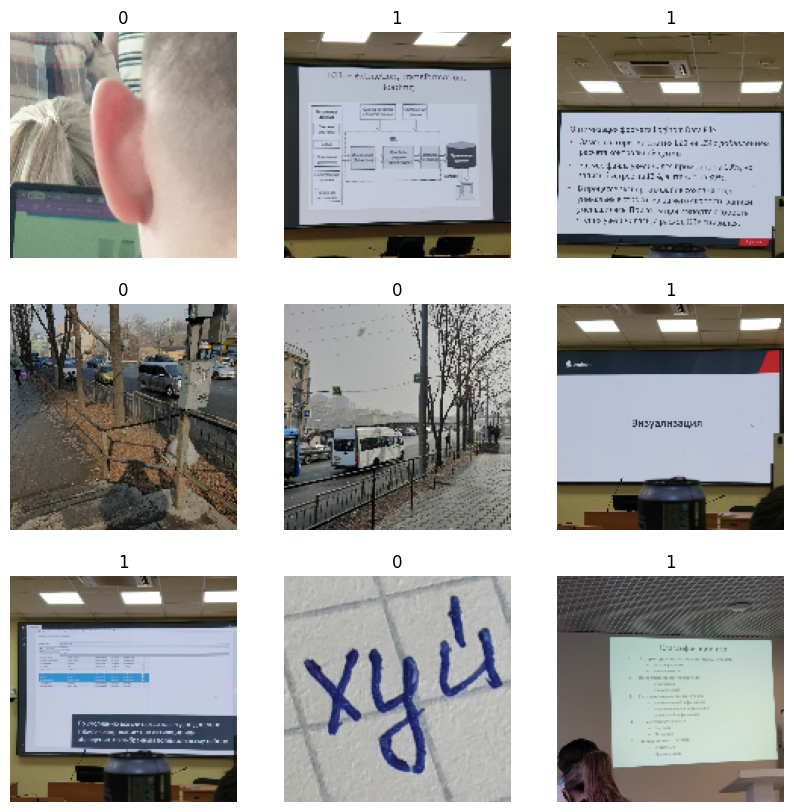

In [44]:
#несколько примеров
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [46]:
#аугментация изображений
data_augmentation = keras.Sequential(
[
    layers.experimental.preprocessing.RandomFlip("horizontal"), #поворот
    layers.experimental.preprocessing.RandomRotation(0.5), #вращение
    layers.experimental.preprocessing.RandomZoom(0.5), #зум
    layers.experimental.preprocessing.RandomContrast(0.5) #контрастность
]
)

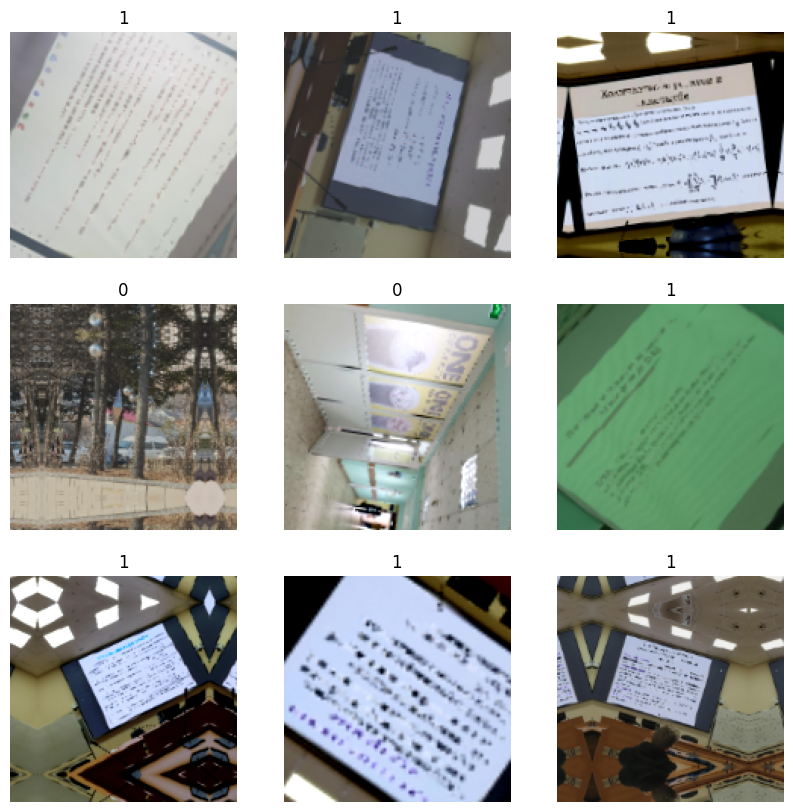

In [47]:
#пример после аугментации
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [48]:
#применяем аугментацию для изображени и увеличиваем за счет этого наборы данных
augmented_train_ds = train_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y)).repeat(300).shuffle(32)

augmented_val_ds = val_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y)).repeat(20).shuffle(32)

In [49]:
train_ds = augmented_train_ds.prefetch(buffer_size=32)
val_ds = augmented_val_ds.prefetch(buffer_size=32)

In [50]:
len(train_ds)

1500